In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_age = pd.read_csv("Enter_korea_by_age.csv")
df_gender = pd.read_csv("Enter_korea_by_gender.csv")

In [3]:
df_visitors = pd.concat([df_age, df_gender[["male", "female", "crewman"]]], axis = 1)
df_visitors.head()

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92,748,1787,35


### 연도별 방문객의 국적 분류

In [4]:
# 2019년 방문객의 국적
df_visitors_nation = df_visitors[["date", "nation", "visitor"]]

nation = [0] * 60

for num in range(60):
    for month in range(12):
        nation[num] += df_visitors_nation["visitor"][num + 60*month]

df_nation = df_visitors_nation[["nation"]][:60]
df_nation_19 = pd.DataFrame(nation, columns = ["visitor_num"])

nation_19 = pd.concat([df_nation, df_nation_19], axis = 1)
nation_19.head()

,nation,visitor_num
0,China,6023021
1,Japan,3271706
2,Taiwan,1260493
3,Hong Kong,694934
4,Macao,52462


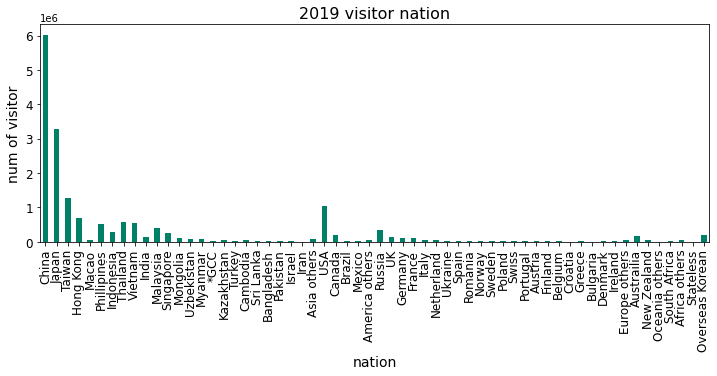

In [5]:
nation_19.plot(kind = "bar", x = "nation", figsize = (12, 4), legend = False, fontsize = 12, colormap = "summer")
plt.title("2019 visitor nation", fontsize = 16)
plt.xlabel("nation", fontsize = 14)
plt.ylabel("num of visitor", fontsize = 14)
plt.show()

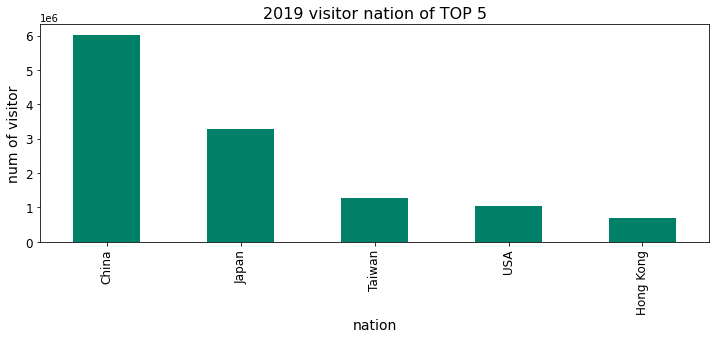

In [6]:
# 2019년 상위 5개국 방문객
nation_19_top5 = nation_19.sort_values(by=["visitor_num"], ascending=False).iloc[:5]

nation_19_top5.plot(kind = "bar", x = "nation", figsize = (12, 4), legend = False, fontsize = 12, colormap = "summer")
plt.title("2019 visitor nation of TOP 5", fontsize = 16)
plt.xlabel("nation", fontsize = 14)
plt.ylabel("num of visitor", fontsize = 14)
plt.show()

In [7]:
# 2020년 1~4월 방문객의 국적 순위
df_visitors_nation = df_visitors[["date", "nation", "visitor"]]

nation = [0] * 60

for num in range(60):
    for month in range(4):
        nation[num] += df_visitors_nation["visitor"][num + 60*month + 720]

df_nation = df_visitors_nation[["nation"]][:60]
df_nation_20 = pd.DataFrame(nation, columns = ["visitor_num"])

nation_20 = pd.concat([df_nation, df_nation_20], axis = 1)
nation_20.head()

,nation,visitor_num
0,China,606297
1,Japan,423875
2,Taiwan,164136
3,Hong Kong,88225
4,Macao,5867


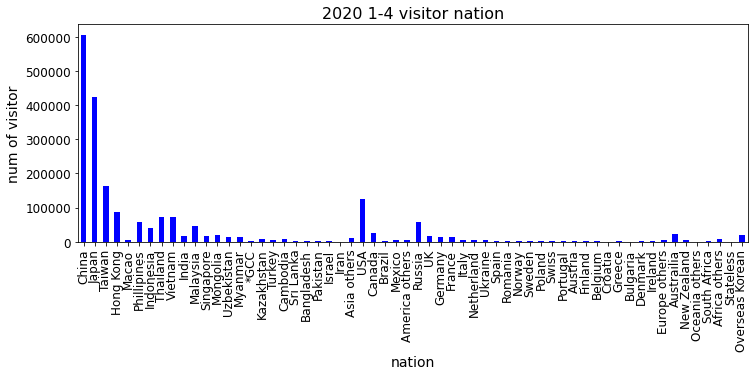

In [8]:
nation_20.plot(kind = "bar", x = "nation", figsize = (12, 4), legend = False, fontsize = 12, colormap = "winter")
plt.title("2020 1-4 visitor nation", fontsize = 16)
plt.xlabel("nation", fontsize = 14)
plt.ylabel("num of visitor", fontsize = 14)
plt.show()

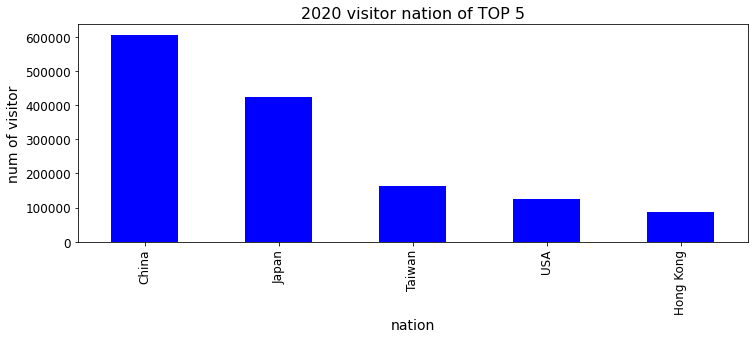

In [9]:
# 2020년 1~4월 상위 5개국 방문객
nation_20_top5 = nation_20.sort_values(by=["visitor_num"], ascending=False).iloc[:5]

nation_20_top5.plot(kind = "bar", x = "nation", figsize = (12, 4), legend = False, fontsize = 12, colormap = "winter")
plt.title("2020 visitor nation of TOP 5", fontsize = 16)
plt.xlabel("nation", fontsize = 14)
plt.ylabel("num of visitor", fontsize = 14)
plt.show()

### 월별 방문객 추이

In [10]:
df_visitors.head()

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92,748,1787,35


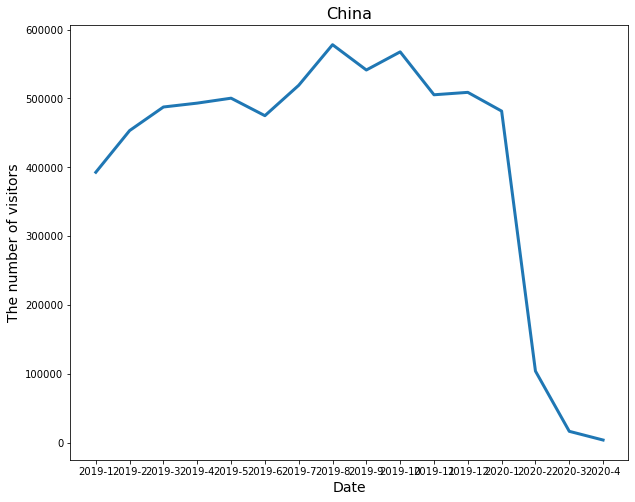

In [11]:
# 월별 국가의 방문객 추이
df_visitors_nation = df_visitors[["date", "nation", "visitor"]]

def time_visitor_graph(name):
    x = df_visitors_nation[df_visitors_nation['nation']==name].date
    y = df_visitors_nation[df_visitors_nation['nation']==name].visitor
    plt.figure(figsize = (10, 8))
    plt.title(name, fontsize = 16)
    plt.ylabel("The number of visitors", fontsize = 14)
    plt.xlabel("Date", fontsize = 14)
    plt.plot(x, y, linewidth=3.0)
    plt.show()
    
time_visitor_graph("China")

### 연령별 방문객

In [12]:
df_visitors.head()

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92,748,1787,35


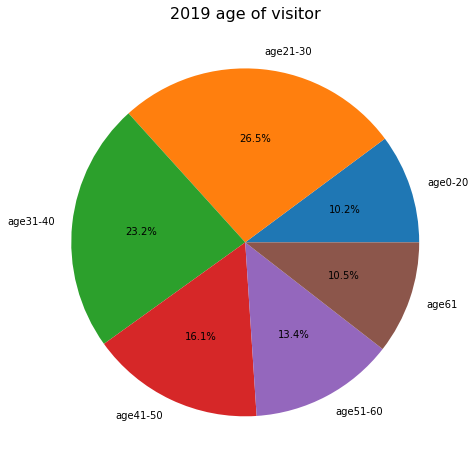

In [13]:
# 2019년 방문객의 연령 비율
df_visitors_age = df_visitors[["date", "nation", "age0-20", "age21-30", "age31-40", "age41-50", "age51-60", "age61"]]

age0_20 = 0
age21_30 = 0
age31_40 = 0
age41_50 = 0
age51_60 = 0
age61 = 0

for num in range(720):
    age0_20 += df_visitors_age["age0-20"][num]
    age21_30 += df_visitors_age["age21-30"][num]
    age31_40 += df_visitors_age["age31-40"][num]
    age41_50 += df_visitors_age["age41-50"][num]
    age51_60 += df_visitors_age["age51-60"][num]
    age61 += df_visitors_age["age61"][num]

x = [age0_20, age21_30, age31_40, age41_50, age51_60, age61]
label = ["age0-20", "age21-30", "age31-40", "age41-50", "age51-60", "age61"]

plt.figure(figsize = (10, 8))
plt.title("2019 age of visitor", fontsize = 16)
plt.pie(x, labels = label, autopct = "%.1f%%")
plt.show()

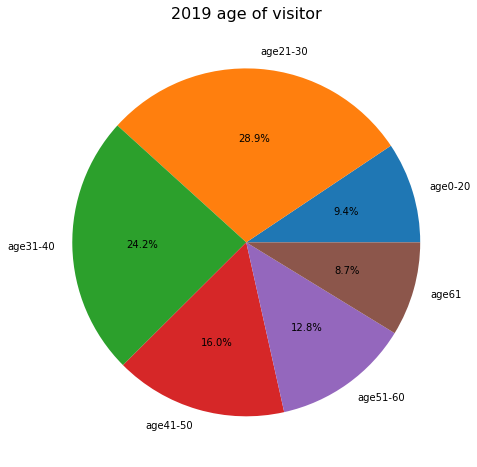

In [14]:
# 2020년 1~4월 방문객의 연령 비율
df_visitors_age = df_visitors[["date", "nation", "age0-20", "age21-30", "age31-40", "age41-50", "age51-60", "age61"]]

age0_20 = 0
age21_30 = 0
age31_40 = 0
age41_50 = 0
age51_60 = 0
age61 = 0

for num in range(720, 960):
    age0_20 += df_visitors_age["age0-20"][num]
    age21_30 += df_visitors_age["age21-30"][num]
    age31_40 += df_visitors_age["age31-40"][num]
    age41_50 += df_visitors_age["age41-50"][num]
    age51_60 += df_visitors_age["age51-60"][num]
    age61 += df_visitors_age["age61"][num]

x = [age0_20, age21_30, age31_40, age41_50, age51_60, age61]
label = ["age0-20", "age21-30", "age31-40", "age41-50", "age51-60", "age61"]

plt.figure(figsize = (10, 8))
plt.title("2019 age of visitor", fontsize = 16)
plt.pie(x, labels = label, autopct = "%.1f%%")
plt.show()

### 남여 성별

In [15]:
df_visitors_gender = df_visitors[["date", "male", "female", "crewman"]]
df_visitors_gender.head()

,date,male,female,crewman
0,2019-1,147511,231722,13581
1,2019-1,75070,129029,2427
2,2019-1,30805,56202,947
3,2019-1,12172,22729,995
4,2019-1,748,1787,35


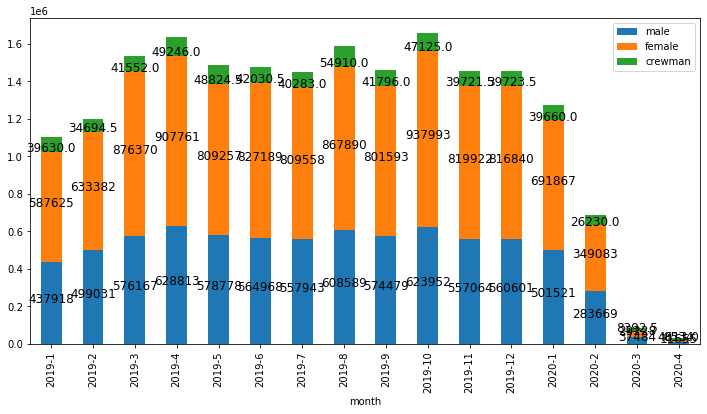

In [16]:
# 월에 따른 성별 방문객 추이
month = [""] * 16
male = [0] * 16
female = [0] * 16
crewman = [0] * 16

for i in range(16):
    month[i] = df_visitors_gender["date"][60*i + 1]
    for j in range(60):
        male[i] += df_visitors_gender["male"][60*i + j]
        female[i] += df_visitors_gender["female"][60*i + j]
        crewman[i] += df_visitors_gender["crewman"][60*i + j]

month_gender = pd.DataFrame({"month": month, "male": male, "female": female, "crewman": crewman})
month_gender.head()
month_gender.plot(kind = "bar", x = "month", stacked = True, figsize = (12, 6))
for i in range(16):
    plt.text(i, male[i]/2, male[i], horizontalalignment = "center", size = 12)
    plt.text(i, male[i] + female[i]/2, female[i], horizontalalignment = "center", size = 12)
    plt.text(i, male[i] + female[i], crewman[i]/2, horizontalalignment = "center", size = 12)
plt.show()

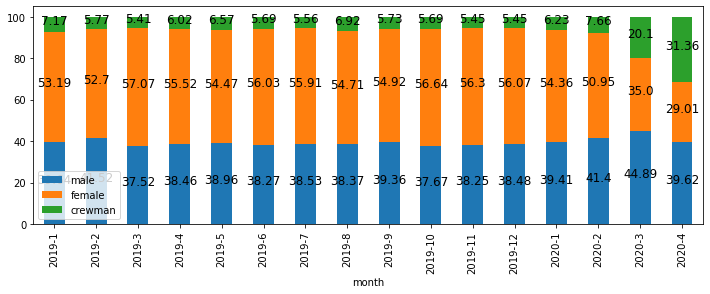

In [17]:
# 월에 따른 성별 방문객 추이(%)
male_percent = [0] * 16
female_percent = [0] * 16
crewman_percent = [0] * 16

for i in range(16):
    M = 0
    F = 0
    C = 0
    for j in range(60):
        M += df_visitors_gender["male"][60*i + j]
        F += df_visitors_gender["female"][60*i + j]
        C += df_visitors_gender["crewman"][60*i + j]
        male_percent[i] = M / (M + F + C) * 100
        female_percent[i] = F / (M + F + C) * 100
        crewman_percent[i] = C / (M + F + C) * 100
female_percent
month_gender = pd.DataFrame({"month": month, "male": male_percent, "female": female_percent, "crewman": crewman_percent})
month_gender.head()
month_gender.plot(kind = "bar", x = "month", stacked = True, figsize = (12, 4))
for i in range(16):
    plt.text(i, male_percent[i]/2, round(male_percent[i], 2), horizontalalignment = "center", size = 12)
    plt.text(i, male_percent[i] + female_percent[i]/2, round(female_percent[i],2), horizontalalignment = "center", size = 12)
    plt.text(i, male_percent[i] + female_percent[i] + crewman_percent[i]/2, round(crewman_percent[i], 2), horizontalalignment = "center", size = 12)
plt.show()